In [1]:
%pip install tensorflow

  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 3.4 MB/s eta 0:01:56
   ---------------------------------------- 1.0/390.2 MB 2.8 MB/s eta 0:02:20
   ---------------------------------------- 1.8/390.2 MB 3.0 MB/s eta 0:02:12
   ---------------------------------------- 2.4/390.2 MB 3.0 MB/s eta 0:02:11
   ---------------------------------------- 3.1/390.2 MB 3.1 MB/s eta 0:02:04
   ---------------------------------------- 3.9/390.2 MB 3.3 MB/s eta 0:01:59
    --------------------------------------- 5.0/390.2 MB 3.4 MB/s eta 0:01:55
    --------------------------------------- 5.5/390.2 MB 3.4 MB/s eta 0:01:53
    --------------------------------------- 6.3/390.2 MB 3.3 MB/s eta 0:01:56
    --------------

In [1]:
# Mengimpor pustaka yang diperlukan
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Memuat dataset MNIST (dataset angka tulisan tangan)
# Anda bisa menggantinya dengan dataset gambar lain
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Preprocessing data
# Mengubah dimensi data dan melakukan normalisasi (membuat nilai antara 0 dan 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


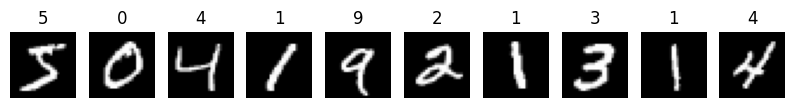

In [6]:
def plot_minst_images(images, labels, num_images=10):
    plt.figure(figsize = (10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()
    
plot_minst_images(train_images, train_labels, num_images=10)

In [7]:
# Mengubah label menjadi bentuk one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [8]:
# Membangun model CNN
model = models.Sequential()
# Menambahkan layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Menambahkan layer pooling (pengurangan dimensi)
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan layer konvolusi ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer dense (fully connected layer)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output 10 kelas (untuk klasifikasi 0-9)
# Melihat arsitektur model
model.summary()
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Melatih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

c:\Users\Dimas Tri Wicaksono\MSIB2024-2\myenvirontment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8888 - loss: 0.3492 - val_accuracy: 0.9823 - val_loss: 0.0548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9854 - loss: 0.0485 - val_accuracy: 0.9896 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9886 - val_loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9898 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9909 - val_loss: 0.0301


313/313 - 1s - 3ms/step - accuracy: 0.9909 - loss: 0.0301
Akurasi pada data uji: 0.9909


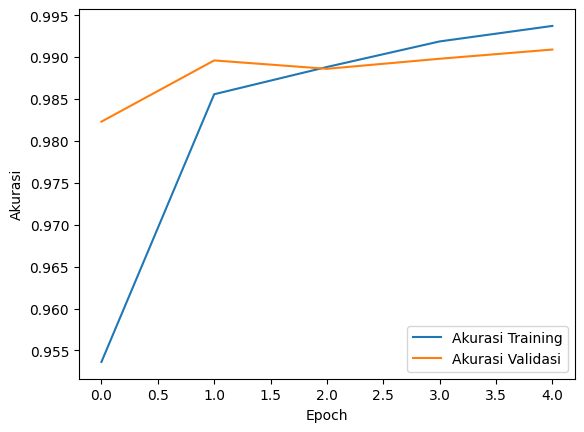

In [9]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Akurasi pada data uji: {test_acc:.4f}')

# Plot hasil akurasi dan loss
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()